https://github.com/luispedro/BuildingMachineLearningSystemsWithPython/blob/master/ch01/analyze_webstats.py

http://gildang.co.kr/%EC%B2%AB-%EB%B2%88%EC%A7%B8-%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5-%EC%95%A0%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98/



# <font color='red'/> 시간당 100,000요청은 몇 째 주 쯤에 달성될 것인가?

# <font color='orange'/> 데이터 로딩, 클랜징 및 plot 함수 선언

In [13]:
import os
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
sp.random.seed(3)  # to reproduce the data later on

data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
print type(data)
print(data[:10])
print(data.shape)

<type 'numpy.ndarray'>
[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


In [15]:
# all examples will have three classes in this file
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

# x는 시를 의미(분x, 초x)
x = data[:, 0]
y = data[:, 1]

# 배열 data의 1번 열(2번째 열)이 NaN값인 것들의 갯수
print("Number of invalid entries:", sp.sum(sp.isnan(y)))

('Number of invalid entries:', 8)


In [16]:
sp.sum(sp.isnan(y))

8

In [17]:
# y값이 NaN값이 아닌 것들만 x, y로 사용
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
print len(x)
print len(y)

735
735


In [73]:
# fname은 저장할 파일이름
# mx는 x축의 범위를 지정
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 5))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    # x축의 범위마다 지정할 이름
    plt.xticks(
        [w * 24 * 7 for w in range(10)], ['week %i' % w for w in range(10)])
        # 시간단위를 주단위로 변환
    
    # models 매개변수가 지정이 되었다면,
    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            #print "Model:",model,
            #print "Coeffs:",model.coeffs,'\n'
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
        
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# <font color='orange'/> Model 1

In [21]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [24]:
df = pd.DataFrame({'time':x, 'traffic':y})
df.head()

,time,traffic
0,1,2272
1,3,1386
2,4,1365
3,5,1488
4,6,1337


In [27]:
results = smf.ols('traffic ~ time', data=df).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                traffic   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     522.8
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           9.14e-88
Time:                        11:55:10   Log-Likelihood:                -5811.5
No. Observations:                 735   AIC:                         1.163e+04
Df Residuals:                     733   BIC:                         1.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    989.0249     48.994     20.187      0.0

In [28]:
# create and plot models
# polyfit - Least squares polynomial fit.
# 위의 1차회귀 결과와 같다

fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)

Model parameters of fp1: [   2.59619213  989.02487106]
('Error of the model of fp1:', array([  3.17389767e+08]))


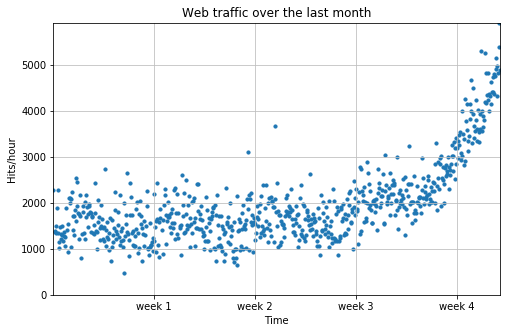

In [35]:
plot_models(x, y, None, os.path.join("1400_01_01.png"))

# <font color='orange'/> Model 2(2차 회귀)

In [32]:
# 계수를 이용해 방정식을 만드는 함수. 이전에 1차회귀식에서 나온 계수를 활용
f1 = sp.poly1d(fp1)
print fp1
print f1

[   2.59619213  989.02487106]
 
2.596 x + 989


In [93]:
# polyfit -> 2 / 2차 회귀로 계산
fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp2: %s" % fp2)
print("Error of the model of fp2:", res2)

Model parameters of fp2: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
('Error of the model of fp2:', array([  1.79983508e+08]))


In [118]:
# 오차는 직선모델(1차 회귀)의 절반
# 모델이 복잡할 수록 더 나은 결과가 나온다 -> 복잡성을 증가시켜보면 어떨까?
# 밑에서는 차수를 3, 10, 100으로 시도

Model:  
2.596 x + 989 Coeffs: [   2.59619213  989.02487106] 



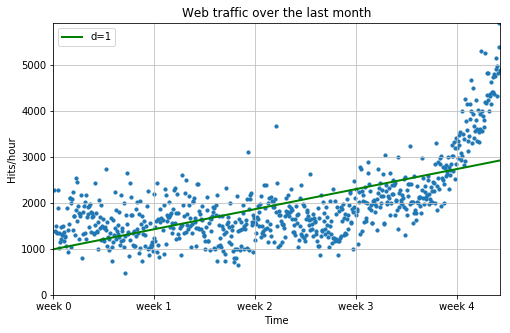

In [47]:
plot_models(x, y, [f1], os.path.join("1400_01_02.png"))

# <font color='orange'/> Model 3 (1차회귀, 2차회귀 그래프 중첩해서 비교)

In [42]:
f2 = sp.poly1d(fp2)
print fp2, '\n'
print f2, '  =>  0.01053x^2 - 5.265x + 1975'

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03] 

         2
0.01053 x - 5.265 x + 1975   =>  0.01053x^2 - 5.265x + 1975


Model:  
2.596 x + 989 Coeffs: [   2.59619213  989.02487106] 

Model:          2
0.01053 x - 5.265 x + 1975 Coeffs: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03] 



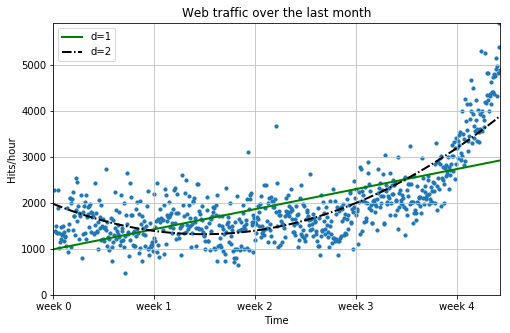

In [48]:
plot_models(x, y, [f1, f2], os.path.join('..', "1400_01_03.png"))

# <font color='orange'/> Model 4(3차, 10차, 100차 회귀)

In [49]:
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))
# d=53인 다항식으로 인해 100차 다항식을 볼 수는 없다.
# 경고창: Polyfit may be poorly conditioned
# 53차면 충분하다는 의미

/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


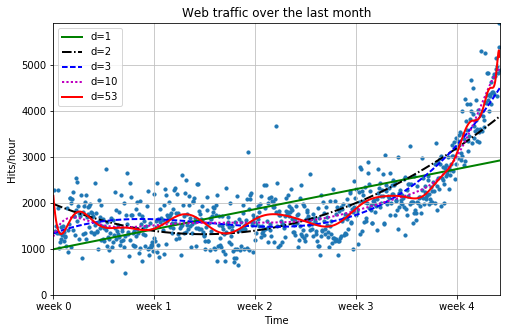

In [74]:
plot_models(x, y, [f1, f2, f3, f10, f100], os.path.join("1400_01_04.png"))

In [117]:
# 복잡한 데이터를 입력받을수록, 곡선은 이를 반영해 좀 더 적합해진다. 
# 오차도 동일한 결론을 보여준다

In [56]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

In [58]:
# 차수를 높일 수록 잔차가 작아지는 것을 확인할 수 있다
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363701
Error d=53: 109452397.586125


In [ ]:
# 하지만 위 그래프에서 적합화된 곡선들을 자세히 보면, 곡선들이
# 이러한 데이터를 잘 담아내고 있는지 궁금해진다.
# 달리 말해, 모델이 웹사이트 방문자들의 큰 흐름을 잘 표현하는가?
# 10차 다항식과 53차 다항식은 넓은 범위에서 굴곡이 너무 많다.
# 이는 모델이 너무 많은 데이터를 적합화한 것으로 보여진다.
# 주요 데이터 뿐만 아니라 노이즈(noise)까지 반영되었는데,
# 이를 과적합화(overfitting)이라고 한다.

# 이쯤에서 다음을 선택해야 한다
# - 적합화된 다항식 모델 중 하나를 선택할지
# - spline같은 좀 더 복잡한 모델로 바꿀지
# - 데이터를 다르게 분석하고 다시 시작할지

# 5개의 모델 중 1차 다항식 모델은 너무 단순
# 10차, 53차 다항식 모델은 과적합화
# 2차, 3차 다항식 모델이 적당하지만, 
# 2개의 경계선에서 추출한다면 이 또한 엉망이 될 것임

# 다른 모델로 바꾸는 방법 또한 적당하지 않아 보임
# 아직 데이터를 완벽하게 이해하지 못했다는 생각이 듦

In [ ]:
# 데이터 다시 보기

# 산포도를 다시 보면, 3주차와 4주차 사이에 변곡점이 있음을 알 수 있다
# 산점도에서 보듯, week3과 week4 사이에 
# traffic이 급속하게 증가하는 경향이 있으므로, 
# 구간을 나누어 회귀식을 따로 구한다

# 3.5주차를 기준으로 데이터를 둘로 나누고 두 선을 따로 훈련하자

# 3주차까지 첫 번째 직선을 훈련
# 3주 이후부터는 두 번째 직선을 훈련

# <font color='orange'/> Model 5 (구간을 나누어 1차 회귀 다시 실시)

In [54]:
# fit and plot a model using the knowledge about inflection point
inflection = 3.5 * 7 * 24

# week3.5까지의 데이터
xa = x[:inflection]
ya = y[:inflection]

# week3.5 ~ week4까지의 데이터
xb = x[inflection:]
yb = y[inflection:]

# 나뉜 구간으로 1차 회귀를 다시 실행
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
print fa
print fb

 
0.8399 x + 1400
 
21.07 x - 1.092e+04


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


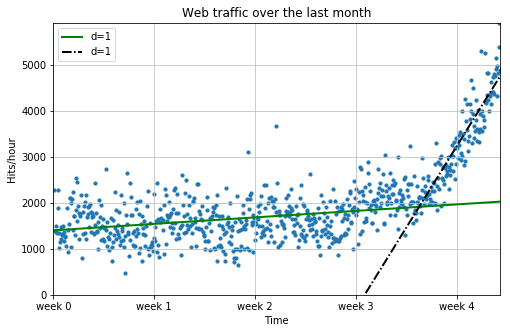

In [75]:
plot_models(x, y, [fa, fb], os.path.join("1400_01_05.png"))

# <font color='orange'/> 각 모델별 잔차 확인

In [71]:
f1

poly1d([   2.59619213,  989.02487106])

In [69]:
# 위에서 polyfit 1차회귀의 잔차와 결과가 같다
print f1,'\n'
print sp.sum((f1(x) - y) ** 2)

 
2.596 x + 989 

317389767.34


In [56]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

In [58]:
# 차수를 높일 수록 잔차가 작아지는 것을 확인할 수 있다
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363701
Error d=53: 109452397.586125


In [59]:
# week3.5부터 week4까지의 회귀선의 잔차들
print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809621
Error d=3: 33214248.905597
Error d=10: 21611594.264180
Error d=53: 18656100.666838


In [60]:
print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))
# 두 직선의 결합에서 발생하는 것이 이전모델(모든 주를 합한 것들)들보다 오차가
작다.
Error d=1: 317,389,767.339778
Error d=2: 179,983,507.878179
Error d=3: 139,350,144.031725

# 여전히 고차원 다항식보다 높은 오차를 보인다.
# 하지만, 생각할 것은 고차원 다항식보다 오차는 높지만, 직선모델이
# 미래의 데이터를 좀 더 잘 예측할 수 있다고 생각하기 때문에 오차가 고차원 다항식
# 보다 높아도 직선 모델을 사용한다

Error inflection=132950348.197616


# <font color='orange'/> Model 6

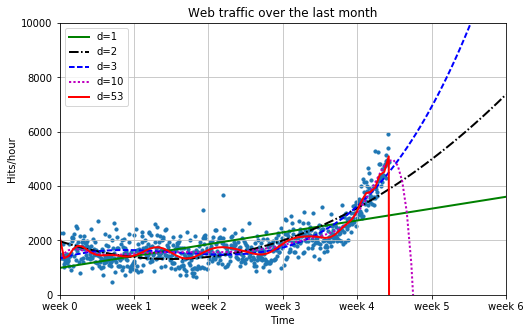

In [81]:
plot_models(x, y, [f1, f2, f3, f10, f100], os.path.join("1400_01_06.png"), 
            mx=sp.linspace(0*7*24, 6*7*24, 100), ymax=10000, xmin=0*7*24)

In [ ]:
# 10차 다항식과 53차 다항식 모델에 따르면 우리 회사의 미래가 밝지 않다. 데이터
# 를 너무 잘 반영해 모델화되어 미래의 예측도 쓸모없어졌다. -> 과적합화다. 

# 반면, 저차 다항식 모델은 데이터를 작당하게 반영하지 못한 것으로 보인다.
# 이는 과소적합under-fiting이다.

# <font color='orange'/> Model 7

In [85]:
print fb

 
21.07 x - 1.092e+04


In [90]:
# 변곡점 이후 시간에 대한 오차만을 계산
# week3.5 ~ week4까지의 1차회귀식을 가지고 다시 다항회귀 실시
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))
print fb2

Trained only on data after inflection point
         2
0.07893 x - 84.69 x + 2.437e+04


/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [87]:
# 원데이터의 1차회귀식을 가지고 했을 때보다는 잔차가 줄어들었다
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.502692
Error d=53: 18300724.288006


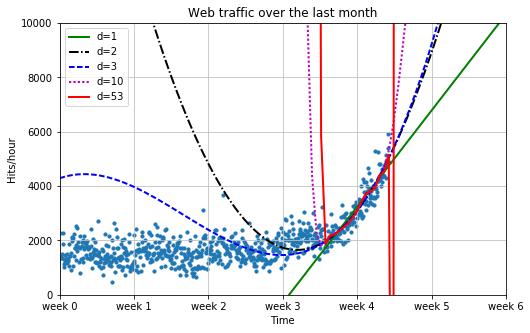

In [89]:
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join("1400_01_07.png"),
    mx=sp.linspace(0*7*24, 6*7*24, 100),
    ymax=10000, xmin=0*7*24)

# <font color='orange'/> training set, test set 분리

In [137]:
# 모델의 정확도를 낮추는 미래의 데이터를 갖고 있더라도, 근사치 오차를 
# 바탕으로 모델을 선택할 수 있어야 한다.

# 미래를 볼 수 없더라도 
# 부분 데이터로 유사한 영향을 가정해야만 한다.

In [127]:
frac = 0.3
split_idx = int(frac * len(xb)) # 44가 출력됨

# len(xb) = 147
shuffled = sp.random.permutation(list(range(len(xb))))

# sorted(shuffled[:44]) week3.5~week4 사이 x값들의 30%
test = sorted(shuffled[:split_idx])

# sorted(shuffled[44:]) week3.5~week4 사이 x값들의 70%
train = sorted(shuffled[split_idx:])

# 1차 회귀
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))

# 2차 회귀
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))

In [128]:
# 2차 회귀를 실시했을 때의 계수
print("fbt2(x)= \n%s" % fbt2),'\n\n'
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)= 
         2
0.07342 x - 78.04 x + 2.239e+04 


fbt2(x)-100,000= 
         2
0.07342 x - 78.04 x - 7.761e+04


In [130]:
# train set으로 polyfit을 실시하고, error체크는 test set으로 한다.
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

# 잔차항이 가장 작을 때에는 d=2일 때
# 마침내 최후의 승자를 찾아낸 듯하다. 
# 그 모델은 바로 테스트 오차가 가장 작은 2차 다항식이다.

# 이 오차는 훈련(train) 동안, 
# 모델(test)이 알 수 없는 데이터를 사용하고 측정했다.

# 이로써 미래의 데이터가 나쁘지 않을 것임음 믿게 한다.

Test errors for only the time after inflection point
Error d=1: 7743478.808951
Error d=2: 6633165.002491
Error d=3: 6904844.466489
Error d=10: 7414527.790485
Error d=53: 9704547.587578


/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [ ]:
# 큰 흐름을 잘 반영하는 모델 = 2차 다항식 회귀선!!!!

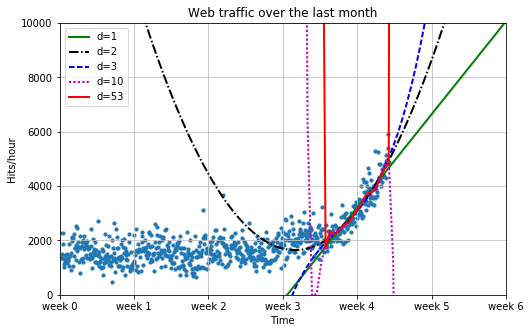

In [136]:
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    #os.path.join(CHART_DIR, "1400_01_08.png"),
    os.path.join('..', "1400_01_08.png"),
    mx=sp.linspace(0*7*24, 6*7*24, 100),
    ymax=10000, xmin=0*7*24)

# <font color='orange'/> 시간당 100,000요청은 몇 주 째에 달성되는가?

In [ ]:
from scipy.optimize import fsolve

In [142]:
# 모델 함수가 100,000이 되는 값을 찾으면 된다
# 2차 다항식에서 100,000을 빼는 방식을 사용한다
print(fbt2),'\n'
print(fbt2 - 100000)

         2
0.07342 x - 78.04 x + 2.239e+04 

         2
0.07342 x - 78.04 x - 7.761e+04


In [145]:
# 시간으로 계산되는 것을 주로 변환
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max)

# 모델은 주어진 현재 사용자의
# 흐름과 회사의 트랜잭션으로 회사의 최대 수용 치가 언제가 될지 알려줄 수 있다.

100,000 hits/hour expected at week 10.053059
